# Introduction 


To develop a model capable of predicting energy consumption in a building based on meteorological data, a thorough study should be conducted on our datasets to determine which algorithm performs optimally.

We are going to test models listed below:

## Machine Learning Algorithms:
    1. Random Forest (RF)
    2. Supported vector Regression (SVR)
    3. Gradient Boosting (GB)
    4. K-nearest Neighbor (KNN)
    5. Linear Regression (LR)
## Deep Learning Algorithms:
    6. Recurrent Neural Networks (RNN)
    7. Artificial Neural Networks (ANN)
    8. Deep Neural Networks (DNN)

# Imorting Required Libraries

here essential libraries and packages are imported:

In [1]:
# for data analysis and manipulation.
import pandas as pd

# to have access to mathematical and statistical functions.
import numpy as np

# For data visualization
import matplotlib.pyplot as plt

#Missing data visualization module for Python.
import missingno as msno

#Statistical data visualization
import seaborn as sns

#to see correlation between features and how they affect each other
from scipy.stats import spearmanr

#Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

#A random forest regressor. ==> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor

#SVR algorithm regressor. ==> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR
from sklearn.svm import SVR

#Coefficient of determination
from sklearn.metrics import r2_score

#MSE
from sklearn.metrics import mean_squared_error

#Exhaustive search over specified parameter values for an estimator. ==> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

# Loading Datasets

Here we have to load our dataset which are 1. Building energy consumption 2. meteorological data

## Loading Building Energyy Consumption Data

In [2]:
# the dataset is in an excel file which we have to load it
Energy = pd.read_excel('/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Datasets/BuildingEnergyConsumption2016_2018.xlsx')
Energy = Energy.set_index('Time')  # for further processing, we need to set index of each smaple with Time
Energy

,EnergyCons
Time,
2016-01-01 01:00:00,23.783228
2016-01-01 02:00:00,23.783228
2016-01-01 03:00:00,23.783228
2016-01-01 04:00:00,23.783228
2016-01-01 05:00:00,23.783228
...,...
2018-12-31 19:00:00,18.602723
2018-12-31 20:00:00,18.838200
2018-12-31 21:00:00,18.602723


electrical energy consumption of building with and hourly resolution for 2016, 2017 and 2018 is now stored in Energy!

### Summary of dataset statistics

In [3]:
Energy.describe()

,EnergyCons
count,26303.000000
mean,25.694969
std,6.317738
min,15.541515
25%,20.957498
50%,23.783228
75%,28.728255
max,59.340330


## Loading Meteorological Data

Now another dataset should be loaded which is meteorological data that are the inpits of our model.

In [4]:
#The inputs of our model are meteorological data reported by KNMI (https://www.knmi.nl/home)
knmi = pd.read_excel('/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Datasets/WeatherData2016_2018.xlsx')
knmi = knmi.set_index('Time') # for further processing, we need to set index of each smaple with Time
knmi

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
Time,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336


This dataset encompass 11 meteorological features for 3 years (2016,2017 and 2018)

### summary of dataset statistic 

In [5]:
knmi.describe()

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
count,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000
mean,6.522108,12.499563,71.303654,77.940995,11.289267,0.779410,45.633008,0.690111,35.962818,62.573091,10161.313044
std,3.448949,6.922087,59.040444,17.318414,7.488253,0.173184,72.777856,2.230664,20.845551,33.522256,95.459902
min,1.000000,1.000000,-159.000000,13.000000,-9.700000,0.130000,0.000000,0.000000,0.000000,0.000000,9712.000000
25%,4.000000,6.500000,29.000000,67.000000,5.700000,0.670000,0.000000,0.000000,20.000000,40.000000,10110.000000
50%,7.000000,12.000000,75.000000,83.000000,10.800000,0.830000,2.000000,0.000000,30.000000,60.000000,10168.000000
75%,10.000000,18.000000,118.000000,92.000000,16.700000,0.920000,67.000000,0.000000,50.000000,80.000000,10225.000000
max,12.000000,24.000000,226.000000,100.000000,36.600000,1.000000,329.000000,10.000000,180.000000,310.000000,10459.000000


# Data Pre-processing

To make datasets ready for model development, we have to get insights to the datasets and eliminate some features if necessary 

## Creating the Dataframe by Combining energy data with weather data

In [6]:
df = pd.concat([knmi,Energy], axis=1) #axis =1 for considering the columns
df

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P,EnergyCons
Time,,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224,23.783228
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228,23.783228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232,23.783228
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237,23.783228
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240,23.783228
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341,18.602723
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338,18.838200
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336,18.602723


First of all, we have to check for missing values.
if there exist any missing values, some techniques are employed  to overcome  this problem.

In [7]:
df.isna().sum()

month         0
HH            0
TD            0
U             0
Temp          0
RH            0
Q             0
DR            0
FF            0
FX            0
P             0
EnergyCons    0
dtype: int64

Since all values are 0, no data is missing and all rows have all features in this dataframe

We can visualize  this:

<Axes: >

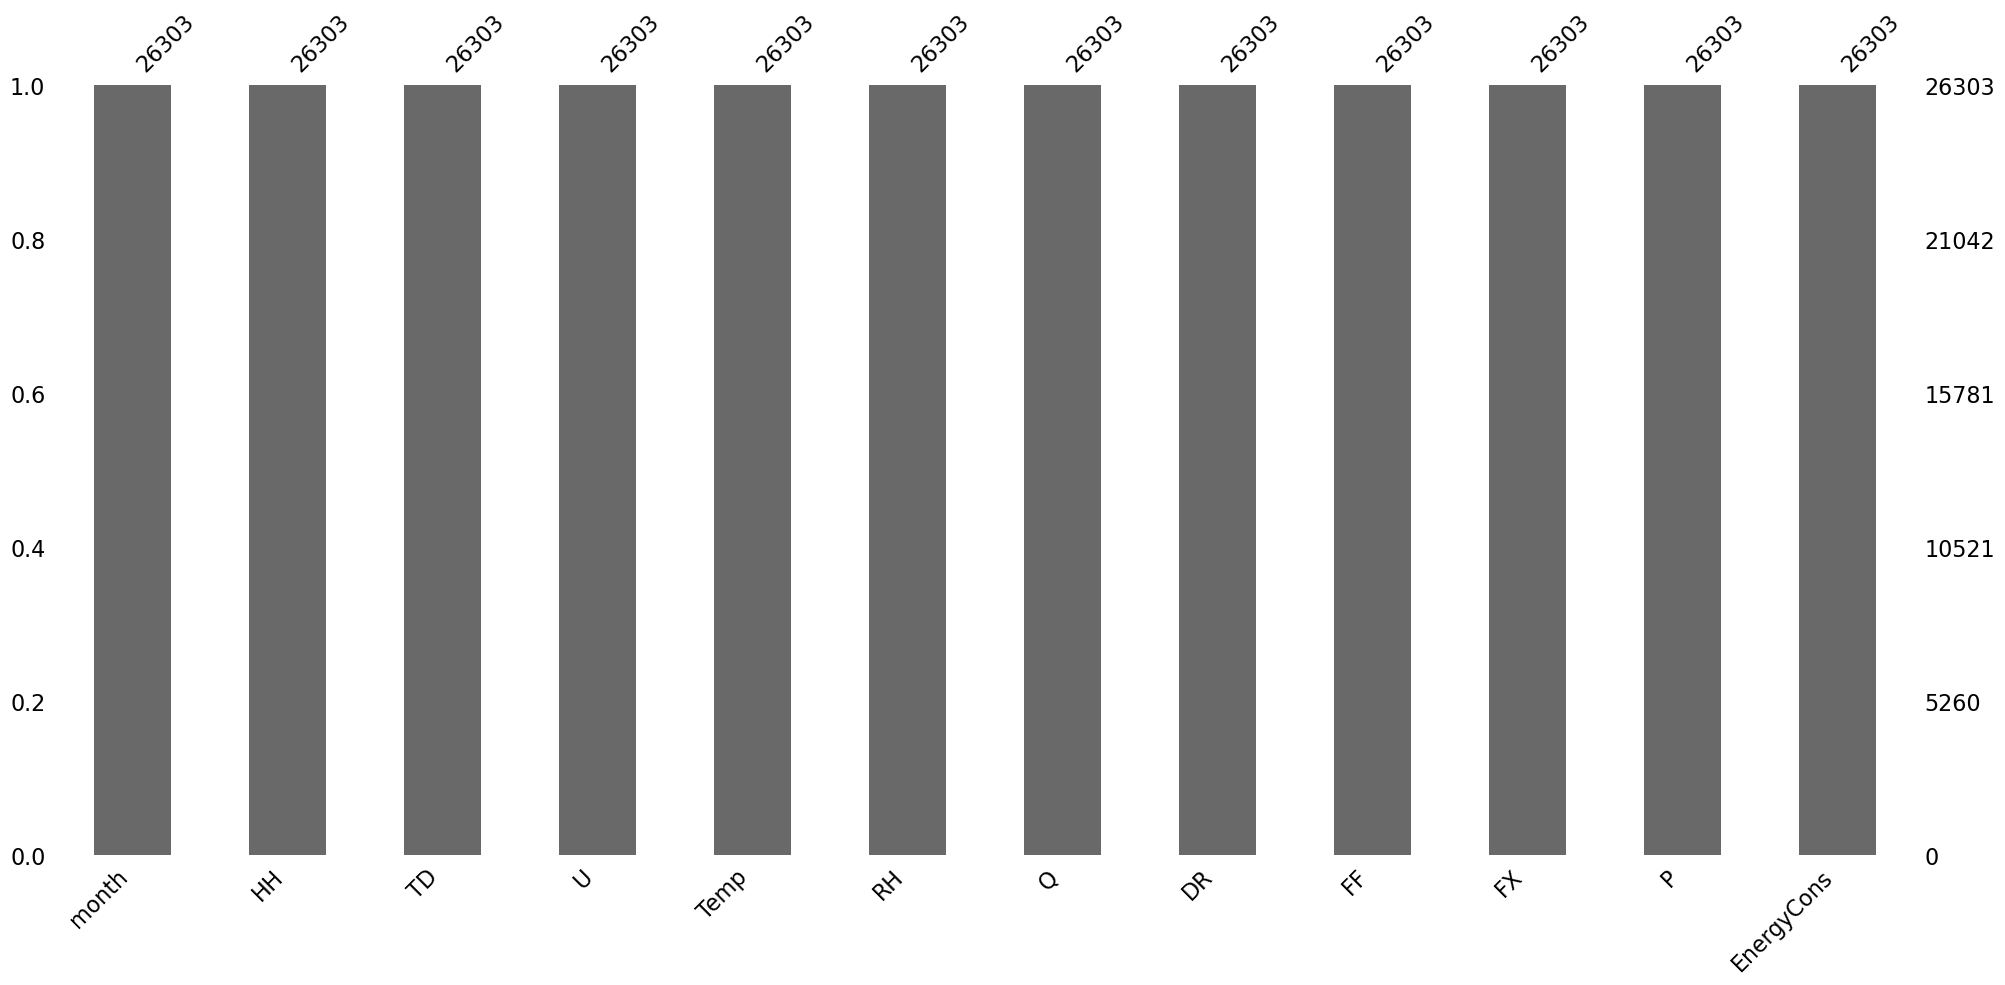

In [8]:
import missingno as msno
msno.bar(df)

*Since there are no missing values in any columns, data is already cleam*

## Feature Selection 

First, the correlation of all parameters with each other should be visualized:

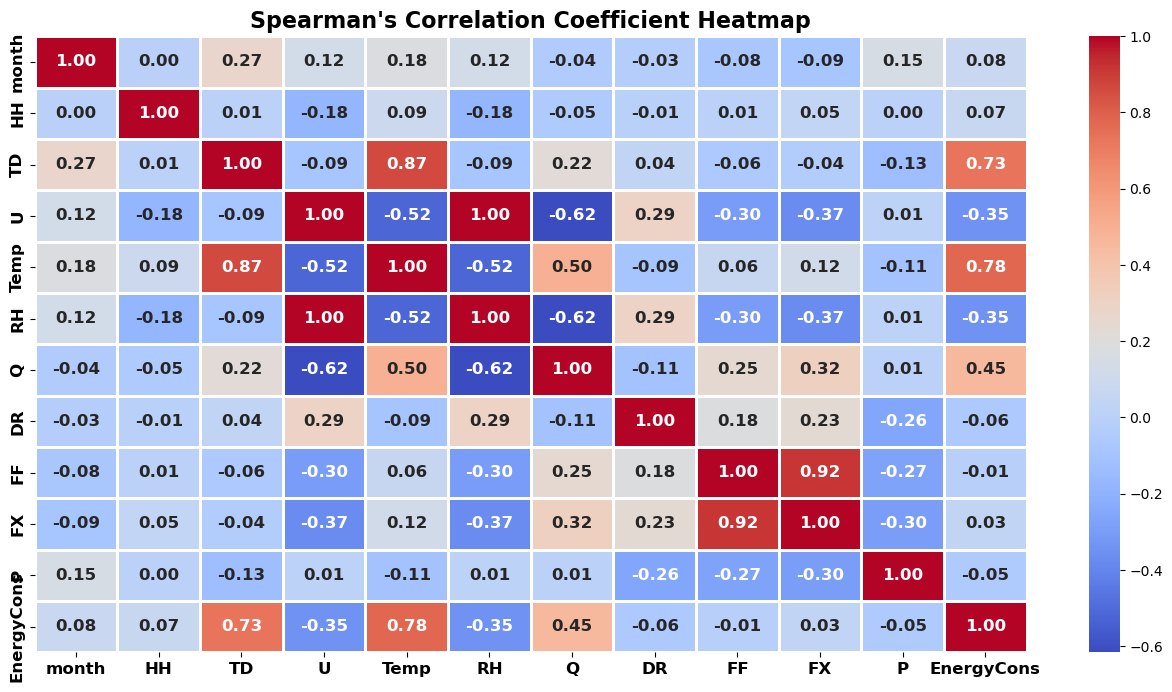

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Spearman correlation matrix
corr_matrix = df.corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(16, 8))  # Create matplotlib figure
heatmap = sns.heatmap(corr_matrix, annot=True, linewidths=1, fmt=".2f", cmap='coolwarm')

# Set larger and bold font properties for the axis labels and title
plt.xticks(rotation='horizontal', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('Spearman\'s Correlation Coefficient Heatmap', fontsize=16, fontweight='bold')

# Set larger and bold font properties for the annotations
for text in heatmap.texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Save the plot as a high-quality TIFF image
plt.savefig('heatmap.tiff', format='tiff', dpi=300)
plt.show()


This heatmap illustrates the pairwise influence of parameters on each other. In this analysis, where Energy Consumption is the target variable, our primary focus is on the impact of meteorological data on energy consumption. However, it is also crucial to consider the strong correlations between some meteorological features themselves. Generally, a higher Spearman correlation coefficient indicates a stronger relationship between features. Ultimately, considering the Spearman correlations and guided by expert judgment, we conduct our feature selection study.

Calculation of Spearsman Correlation Coefficient between meteorological parameters and energy consumption of building:

In [10]:
#filter columns from dataframe
energy = np.array(df["EnergyCons"])
hour = np.array(df["HH"])
month = np.array(df["month"])
TD = np.array(df["TD"])
U = np.array(df["U"])
Temp = np.array(df["Temp"])
RH = np.array(df["RH"])
Q = np.array(df["Q"])
DR = np.array(df["DR"])
FF = np.array(df["FF"])
FX = np.array(df["FX"])
P = np.array(df["P"])
# calculate spearman's correlation
corr1, _ = spearmanr(energy, hour)
corr2,_ = spearmanr(energy, month)
corr3,_ = spearmanr(energy, TD)
corr4,_ = spearmanr(energy, U)
corr5,_ = spearmanr(energy, Temp)
corr6,_ = spearmanr(energy, RH)
corr7,_ = spearmanr(energy, Q)
corr8,_ = spearmanr(energy, DR)
corr9,_ = spearmanr(energy, FF)
corr10,_ = spearmanr(energy, FX)
corr11,_ = spearmanr(energy, P)
corr12,_ = spearmanr(Temp, TD)
#Printing Spearman's correlation
print('Spearmans correlation between Energy and hour feature: %.3f' % corr1)
print('Spearmans correlation between Energy and month feature: %.3f' % corr2)
print('Spearmans correlation between Energy and TD feature: %.3f' % corr3)
print('Spearmans correlation between Energy and U feature: %.3f' % corr4)
print('Spearmans correlation between Energy and Temp feature: %.3f' % corr5)
print('Spearmans correlation between Energy and RH feature: %.3f' % corr6)
print('Spearmans correlation between Energy and Q feature: %.3f' % corr7)
print('Spearmans correlation between Energy and DR feature: %.3f' % corr8)
print('Spearmans correlation between Energy and FF feature: %.3f' % corr9)
print('Spearmans correlation between Energy and FX feature: %.3f' % corr10)
print('Spearmans correlation between Energy and P feature: %.3f' % corr11)
print('Spearmans correlation between Temp and Dew point feature: %.3f' % corr12)

Spearmans correlation between Energy and hour feature: 0.068
Spearmans correlation between Energy and month feature: 0.077
Spearmans correlation between Energy and TD feature: 0.731
Spearmans correlation between Energy and U feature: -0.346
Spearmans correlation between Energy and Temp feature: 0.777
Spearmans correlation between Energy and RH feature: -0.346
Spearmans correlation between Energy and Q feature: 0.454
Spearmans correlation between Energy and DR feature: -0.062
Spearmans correlation between Energy and FF feature: -0.013
Spearmans correlation between Energy and FX feature: 0.035
Spearmans correlation between Energy and P feature: -0.049
Spearmans correlation between Temp and Dew point feature: 0.865


### Justification of Features elimination

**the less the Spearman's correlation, the less important it is. However, our logic is not only to delete the parameters which has the least Spearman's correlations.** here are the justifications for elimination of each parameter:


1.   **Dew Pint Temperature (TD)**: This feature is considered to be redundant because ambient temperature already exists in the dataset. Both features inherently measure temperature and are correlated with each other. The Spearman correlation coefficient between ambient temperature and dew point temperature is 0.872, indicating a high correlation. This strong association may pose challenges for the model. Consequently, dew point temperature is removed from the dataset.


---



2. **Wind Gust (FX)**: Wind gust and wind speed exhibit a strong correlation, with a Sp value of 0.92. Consequently, utilizing both parameters concurrently can lead to complexity and overfitting. Although wind gust initially appears preferable due to its higher S¬p value compared to wind speed, further analysis reveals that wind gust has greater Sp values when combined with other meteorological parameters. To maintain simplicity, we opt for wind speed over wind gust.


---


3. **Precipitation Duration (DR)**: This feature is excluded due to low Spearman correlation coefficient with energy consumption of building. for the sake of simplicity, this feature is deemed to be insignificant in terms of model development performance.


---

4. **Amount of Precipitation (RH)**: It is hard to eliminate either RH or U, since heatmap shows that they are 100% correlated and their spearsman's correlation with energy is of same magnitude. defenitely, it is better to eliminate one of them to prevent overfitting. we look at the trend of U and RH over 8 years and consider their unstability and fluctuatuin as a criteria for elimination. we check the trend of U and RH from 2018 to 2023!


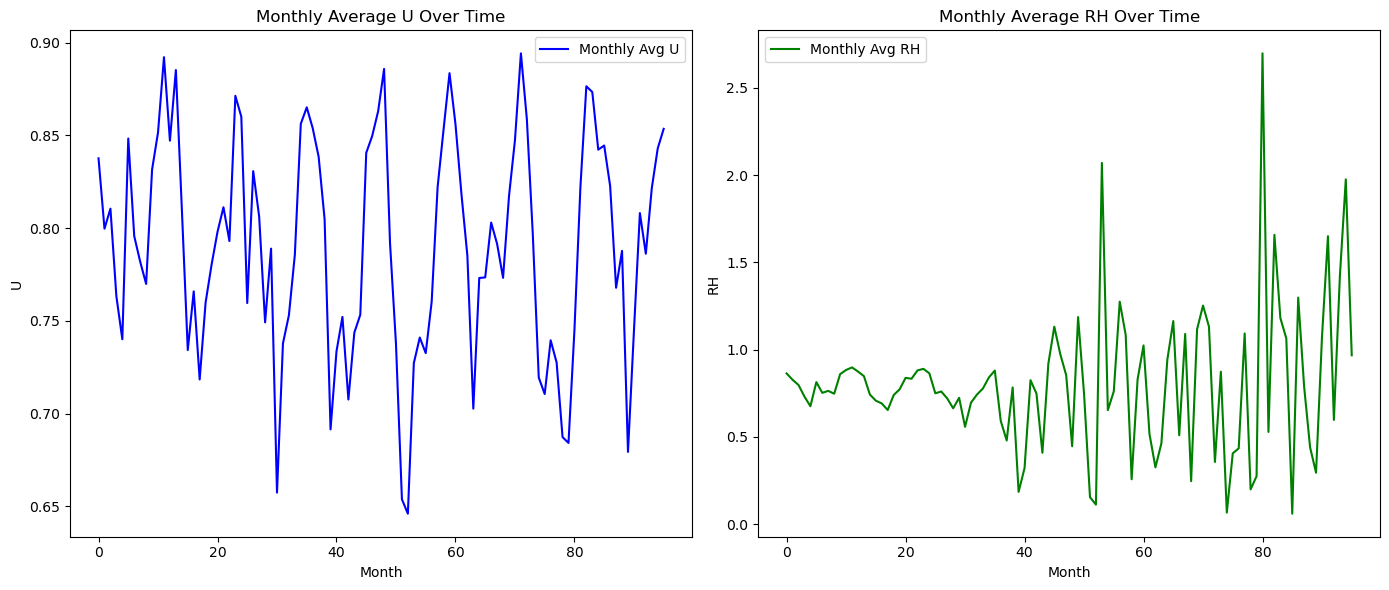

In [11]:
# Importing data that contains monthly averaged Values for U and RH to check their trend over 8 years!
UandRH = pd.read_excel('/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Datasets/Averaged_RH_and_U_2016_2023.xlsx')
UandRH.set_index('Month')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Plot the monthly average of 'U' over time in the first subplot
ax1.plot(UandRH.index, UandRH['U'], color='blue', label='Monthly Avg U')
ax1.set_xlabel('Month')
ax1.set_ylabel('U')
ax1.set_title('Monthly Average U Over Time')
ax1.legend()

# Plot the monthly average of 'RH' over time in the second subplot
ax2.plot(UandRH.index, UandRH['RH'], color='green', label='Monthly Avg RH')
ax2.set_xlabel('Month')
ax2.set_ylabel('RH')
ax2.set_title('Monthly Average RH Over Time')
ax2.legend()

# Improve layout and display the plot
plt.tight_layout()
plt.show()

Clearly, U (relative humidity) graph demonstrate a cyclic pattern, indicating seasonal variations.There is greater variability in 'RH' values compared to 'U', suggesting that 'RH' might be subject to more sporadic changes or influences. as 'U' is more consistent, 'RH' should be eliminated.

### Eliminating TD, FX, DR and RH from dataset

In [12]:
knmi_Updated= knmi.loc[:, ~knmi.columns.isin(["TD","RH","DR","FX"])] # ~ sign drops the columns we select
knmi_Updated['U'] = 0.01*knmi_Updated['U'] #Transfering percentage to fraction
knmi_Updated 

/tmp/ipykernel_539/3497004736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knmi_Updated['U'] = 0.01*knmi_Updated['U'] #Transfering percentage to fraction


,month,HH,U,Temp,Q,FF,P
Time,,,,,,,
2016-01-01 01:00:00,1,1,0.82,6.6,0,30,10224
2016-01-01 02:00:00,1,2,0.83,7.0,0,40,10228
2016-01-01 03:00:00,1,3,0.91,5.9,0,30,10232
2016-01-01 04:00:00,1,4,0.96,4.2,0,20,10237
2016-01-01 05:00:00,1,5,0.98,4.0,0,20,10240
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,0.93,8.7,0,30,10341
2018-12-31 20:00:00,12,20,0.92,8.5,0,30,10338
2018-12-31 21:00:00,12,21,0.89,8.2,0,40,10336


# Performing various algorithms

Here, 8 different model are trainded and tested to check how accurate each model is when it has to respond to unseen data.

Employed metrics: **R^2(Coefficient of determination)** and **MSE(mean squared error)**

## 1. Random Forest (RF)

In [13]:
#Spliting data for training and testing train(80%) , test(20%)
from sklearn.model_selection import train_test_split
#Inputs: Updated Meteorological data (when TD,DR,FX,RH eliminated)
#Output: Building energy consumption 
X_train, X_test, y_train, y_test = train_test_split(knmi_Updated , Energy, test_size = 0.2, random_state = 0)
y_train

,EnergyCons
Time,
2016-11-29 03:00:00,22.370362
2018-01-29 11:00:00,24.725137
2018-07-03 20:00:00,36.028058
2017-09-05 16:00:00,44.034292
2017-03-08 06:00:00,19.309155
...,...
2017-06-30 20:00:00,29.434687
2018-03-29 17:00:00,21.899408
2017-02-14 06:00:00,21.192975


In [14]:
#Creating an instance of the random forest regressor
Ghaziasgar_and_Pourfayaz_RF = RandomForestRegressor(max_depth=10, random_state=0)

# fitting the regression model to the training data
X_train, X_test, y_train, y_test = train_test_split(knmi_Updated, Energy, test_size = 0.2, random_state = 0,shuffle= False)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
Ghaziasgar_and_Pourfayaz_RF.fit(X_train, y_train)

#Predicting on the test set (X_test)
Predicted_Test_RF = Ghaziasgar_and_Pourfayaz_RF.predict(X_test)

#Caculating R2 score and Root mean square error
print('R2 : ',r2_score(y_test,Predicted_Test_RF))
print('MSE : ',mean_squared_error(y_test,Predicted_Test_RF))


R2 :  0.825830496483883
MSE :  9.247927891596241


R2 of 0.82 means that 82% of unseen data can be explaind by the model

##  2. Supported Vector Regression (SVR)

In this model, we need scalers which are responsibe for scaling inputs of a model.

There are 3 types of scalers: **1)Standard Scaler** **2)MinMax Scaler** **3)Robust Scaler**

for the sake of simplicity, we use the scaler that is best for our dataset which is standard scaler (three of them were tested and standard scaler exhibited better results)

In [15]:
from sklearn.preprocessing import StandardScaler #standardizes the data to a range in which the mean is equal to 0 and the standard deviation is 1. It assumes the data is normally distributed.
sc1= StandardScaler() 
X1 = sc1.fit_transform(knmi_Updated)

#Splitting dataset into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy , test_size=0.2, random_state=0, shuffle= False) #X1: Knmi_updated scaled
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
Ghaziasgar_and_Pourfayaz_SVR = SVR(kernel='rbf')
Ghaziasgar_and_Pourfayaz_SVR= Ghaziasgar_and_Pourfayaz_SVR.fit(X_train, y_train)
Ghaziasgar_and_Pourfayaz_SVR

# fitting the regression model to the training data
Ghaziasgar_and_Pourfayaz_SVR.fit(X_train, y_train) #Fit the SVR model according to the given training data.


Predicted_Test_SVR = Ghaziasgar_and_Pourfayaz_SVR.predict(X_test)
##testing the models accuracy on the test data
print('R2 : ',r2_score(y_test, Predicted_Test_SVR))
print('MSE : ',mean_squared_error(y_test, Predicted_Test_SVR))

R2 :  0.8517239177814235
MSE :  7.873057502738421


## 3. Gradient Boosting (GB)

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor


# Splitting  dataset into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle=False) #X1: Knmi_updated scaled
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Scaling the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Building the Gradient Boosting model
Ghaziasgar_and_Pourfayaz_GB = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Fitting the model to the training data
Ghaziasgar_and_Pourfayaz_GB.fit(X_train_scaled, y_train_scaled.ravel())


# Predicting on the test data
Predicted_Test_GB_Scaled = Ghaziasgar_and_Pourfayaz_GB.predict(X_test_scaled)
Predicted_Test_GB = scaler_y.inverse_transform(Predicted_Test_GB_Scaled.reshape(-1, 1))

# Testing the model's accuracy on the test data
print('R2 : ', r2_score(y_test, Predicted_Test_GB))
print('MSE : ', mean_squared_error(y_test, Predicted_Test_GB))

R2 :  0.8382869162497116
MSE :  8.586525812263925


##  4. K-nearest Neighbor(KNN)

In [17]:
from sklearn.neighbors import KNeighborsRegressor


# Splitting  dataset into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle=False) #X1: Knmi_updated scaled
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Scaling the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Building the KNN model
Ghaziasgar_and_Pourfayaz_KNN = KNeighborsRegressor(n_neighbors=10)

# Fitting the model to the training data
Ghaziasgar_and_Pourfayaz_KNN.fit(X_train_scaled, y_train_scaled.ravel())

# Predicting on the test data
Predicted_Test_KNN_Scaled = Ghaziasgar_and_Pourfayaz_KNN.predict(X_test_scaled)
Predicted_Test_KNN = scaler_y.inverse_transform(Predicted_Test_KNN_Scaled.reshape(-1, 1))

# Testing the model's accuracy on the test data
print('R2 : ', r2_score(y_test, Predicted_Test_KNN))
print('MSE : ', mean_squared_error(y_test, Predicted_Test_KNN))

R2 :  0.7929389943767928
MSE :  10.99437737667793


## 5. Linear Regression (LR)

In [18]:
from sklearn.linear_model import LinearRegression


# Splitting dataset into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy , test_size=0.2, random_state=0, shuffle=False) #X1: Knmi_updated scaled
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Scaling the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Building the Linear Regression model
Ghaziasgar_and_Pourfayaz_LR = LinearRegression()

# Fitting the model to the training data
Ghaziasgar_and_Pourfayaz_LR.fit(X_train_scaled, y_train_scaled.ravel())

# Predicting on the test data
Predicted_Test_LR_Scaled = Ghaziasgar_and_Pourfayaz_LR.predict(X_test_scaled)
Predicted_Test_LR = scaler_y.inverse_transform(Predicted_Test_LR_Scaled.reshape(-1, 1))

# Testing the model's accuracy on the test data
print('R2 : ', r2_score(y_test, Predicted_Test_LR))
print('MSE : ', mean_squared_error(y_test, Predicted_Test_LR))


R2 :  0.7084603859228005
MSE :  15.479962186837422


Five machine learning algorithms were developed, and two metrics were computed for each. Subsequently, we pursued three deep learning algorithms to explore the potential for achieving increased accuracy

## 6. Recurrent Neural Networks (RNN)

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense


# Splitting  dataset into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle=False) #X1: Knmi_updated scaled
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Scaling the data for RNN
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape data for RNN (samples, time steps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Building the RNN model
Ghaziasgar_and_Pourfayaz_RNN = Sequential()
Ghaziasgar_and_Pourfayaz_RNN.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
Ghaziasgar_and_Pourfayaz_RNN.add(Dense(1))

Ghaziasgar_and_Pourfayaz_RNN.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model to the training data
Ghaziasgar_and_Pourfayaz_RNN.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32)

# Predicting on the test data
Predicted_Test_RNN_Scaled = Ghaziasgar_and_Pourfayaz_RNN.predict(X_test_scaled)
Predicted_Test_RNN = scaler_y.inverse_transform(Predicted_Test_RNN_Scaled)

# Testing the model's accuracy on the test data
print('R2 : ',r2_score(y_test, Predicted_Test_RNN))
print('MSE : ',mean_squared_error(y_test, Predicted_Test_RNN))

2024-07-15 13:18:43.084912: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-15 13:18:43.087318: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-15 13:18:43.200715: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-15 13:18:43.725681: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-15 13:18:45.300969: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Epoch 1/100


2024-07-15 13:18:47.915445: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-15 13:18:47.915943: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/mohammad/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3686
Epoch 2/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 0.1686
Epoch 3/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - loss: 0.1574
Epoch 4/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - loss: 0.1500
Epoch 5/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 0.1462
Epoch 6/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1452
Epoch 7/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - loss: 0.1449
Epoch 8/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - loss: 0.1464
Epoch 9/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - loss: 0.1428
Epoch 10/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - loss: 0.1418
Epoch 11/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 0.1432
Epoch 12/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - loss: 0.1457
Epoch 13/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 0.1405
Epoch 14/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - loss: 0.1360
Epoch 15/100
658/658 ━━━━━━━━━━

## 7. Artificial Neural Networks(ANN)

In [20]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Splitting dataset into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy , test_size=0.2, random_state=0, shuffle=False) #X1: Knmi_updated scaled
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Scaling the data for ANN
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Building the ANN model
Ghaziasgar_and_Pourfayaz_ANN = Sequential()
Ghaziasgar_and_Pourfayaz_ANN.add(Dense(units=50, activation='relu', input_dim=X_train_scaled.shape[1]))
Ghaziasgar_and_Pourfayaz_ANN.add(Dense(units=1))  # Output layer

Ghaziasgar_and_Pourfayaz_ANN.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model to the training data
Ghaziasgar_and_Pourfayaz_ANN.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32)

# Predicting on the test data
Predicted_Test_ANN_Scaled = Ghaziasgar_and_Pourfayaz_ANN.predict(X_test_scaled)
Predicted_Test_ANN = scaler_y.inverse_transform(Predicted_Test_ANN_Scaled)

# Testing the model's accuracy on the test data
print('R2 : ',r2_score(y_test, Predicted_Test_ANN))
print('MSE : ',mean_squared_error(y_test, Predicted_Test_ANN))

Epoch 1/100


/home/mohammad/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4686
Epoch 2/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1804 
Epoch 3/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - loss: 0.1597
Epoch 4/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - loss: 0.1502
Epoch 5/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - loss: 0.1488
Epoch 6/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - loss: 0.1488
Epoch 7/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - loss: 0.1436
Epoch 8/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - loss: 0.1432
Epoch 9/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - loss: 0.1459
Epoch 10/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - loss: 0.1421
Epoch 11/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - loss: 0.1412
Epoch 12/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - loss: 0.1382
Epoch 13/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - loss: 0.1393
Epoch 14/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - loss: 0.1366
Epoch 15/100
658/658 ━━━━━━━━━

## 8. Deep Neural Networks (DNN)

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


# Splitting dataset into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle=False) #X1: Knmi_updated scaled
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Scaling the data for DNN
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Building the DNN model
Ghaziasgar_and_Pourfayaz_DNN = Sequential()

# Adding layers to the DNN
Ghaziasgar_and_Pourfayaz_DNN.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
Ghaziasgar_and_Pourfayaz_DNN.add(Dense(units=64, activation='relu'))
Ghaziasgar_and_Pourfayaz_DNN.add(Dense(units=32, activation='relu'))
Ghaziasgar_and_Pourfayaz_DNN.add(Dense(units=16, activation='relu'))
Ghaziasgar_and_Pourfayaz_DNN.add(Dense(units=1))  # Output layer for regression

Ghaziasgar_and_Pourfayaz_DNN.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model to the training data
Ghaziasgar_and_Pourfayaz_DNN.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32)

# Predicting on the test data
Predicted_Test_DNN_Scaled = Ghaziasgar_and_Pourfayaz_DNN.predict(X_test_scaled)
Predicted_Test_DNN = scaler_y.inverse_transform(Predicted_Test_DNN_Scaled)

# Testing the model's accuracy on the test data
print('R2 : ', r2_score(y_test, Predicted_Test_DNN))
print('MSE : ', mean_squared_error(y_test, Predicted_Test_DNN))

Epoch 1/100


/home/mohammad/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3180
Epoch 2/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1483
Epoch 3/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1416
Epoch 4/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1346
Epoch 5/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1350
Epoch 6/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1323
Epoch 7/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1277
Epoch 8/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1267
Epoch 9/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1201
Epoch 10/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1182
Epoch 11/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1173
Epoch 12/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1153
Epoch 13/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1156
Epoch 14/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1085
Epoch 15/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step -

# Comparing Algorithms 

employed metrics were R2 and MSE for each model, Here is a summary of them:

In [22]:
R2Score_Models = {
    'RF': r2_score(y_test,Predicted_Test_RF),
    'SVR': r2_score(y_test, Predicted_Test_SVR),
    'GB': r2_score(y_test, Predicted_Test_GB),
    'KNN': r2_score(y_test, Predicted_Test_KNN),
    'LR': r2_score(y_test, Predicted_Test_LR),
    'RNN': r2_score(y_test, Predicted_Test_RNN),
    'ANN' : r2_score(y_test, Predicted_Test_ANN),
    'DNN': r2_score(y_test, Predicted_Test_DNN)

}

MSE_Models = {
    'RF': mean_squared_error(y_test,Predicted_Test_RF),
    'SVR': mean_squared_error(y_test, Predicted_Test_SVR),
    'GB': mean_squared_error(y_test, Predicted_Test_GB),
    'KNN': mean_squared_error(y_test, Predicted_Test_KNN),
    'LR': mean_squared_error(y_test, Predicted_Test_LR),
    'RNN': mean_squared_error(y_test, Predicted_Test_RNN),
    'ANN' : mean_squared_error(y_test, Predicted_Test_ANN),
    'DNN': mean_squared_error(y_test, Predicted_Test_DNN)

}


# Combine R2 and MSE into a single DataFrame
metrics_df = pd.DataFrame({
    'R2_Score': R2Score_Models,
    'MSE': MSE_Models
})

metrics_df

,R2_Score,MSE
RF,0.825830,9.247928
SVR,0.851724,7.873058
GB,0.838287,8.586526
KNN,0.792939,10.994377
LR,0.708460,15.479962
RNN,0.834771,8.773222
ANN,0.853472,7.780239
DNN,0.800371,10.599747


The SVR, RNN, and ANN algorithms demonstrate favorable metrics with only marginal differences in performance. To make an informed decision regarding model selection, examining the scatter plots is essential for assessing each model's performance comprehensively.

Each plot helps evaluate how well each model's predictions align with the actual data.

**X-Axis (Actual Values)**: Represents the ground truth or actual values for the regression task.


**Y-Axis (Predicted Values)**: Represents the values predicted by each respective model.


**Diagonal Line**: The dashed line (y = x) represents the ideal line where predicted values match the actual values perfectly.

**The scatter plots provide a clear visual representation of how well different models predict actual values. The closer the points are to the diagonal line, the better the model's predictions.**

Predicted_Test_GB should be 1-dimensional. Found shape (5261, 1). Reshaping...
Predicted_Test_KNN should be 1-dimensional. Found shape (5261, 1). Reshaping...
Predicted_Test_LR should be 1-dimensional. Found shape (5261, 1). Reshaping...
Predicted_Test_RNN should be 1-dimensional. Found shape (5261, 1). Reshaping...
Predicted_Test_ANN should be 1-dimensional. Found shape (5261, 1). Reshaping...
Predicted_Test_DNN should be 1-dimensional. Found shape (5261, 1). Reshaping...


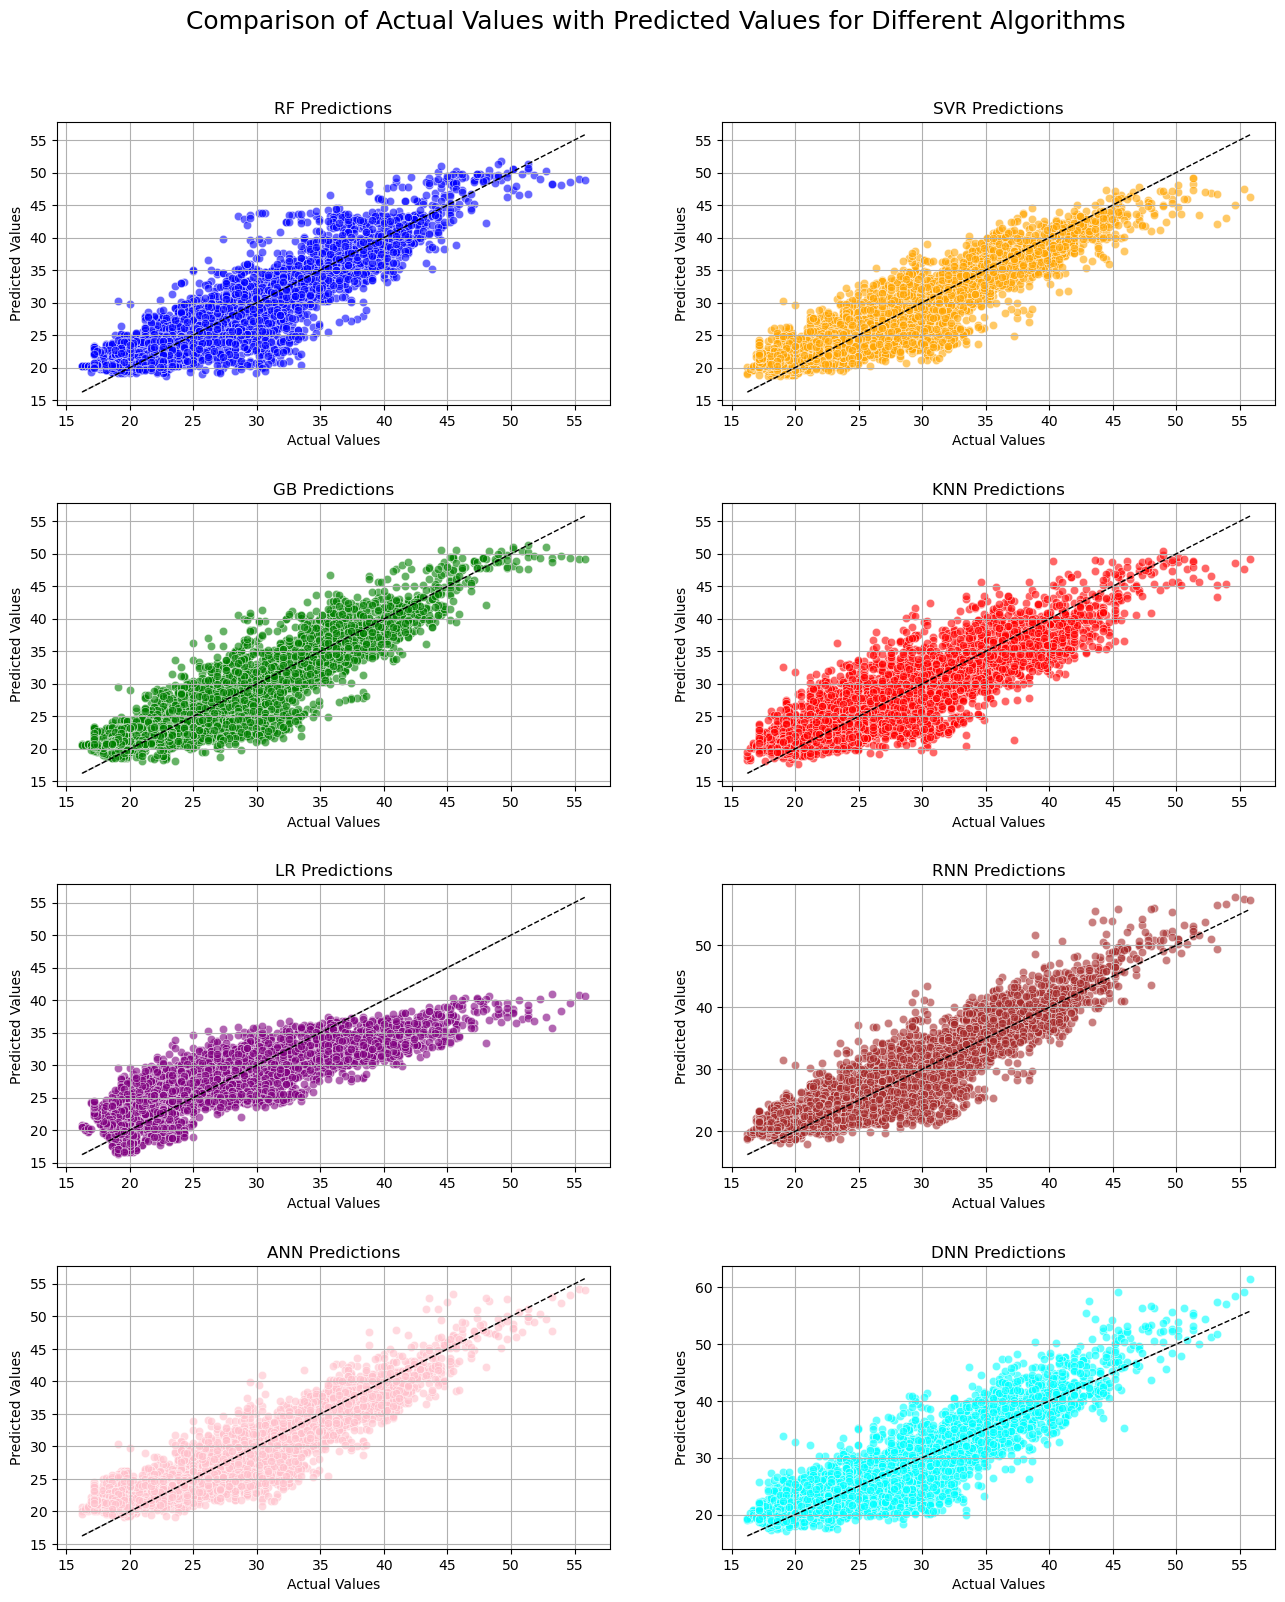

In [23]:
# Function to reshape if necessary and check consistency
def check_and_reshape(array, name, reference_length):
    if len(array.shape) == 2 and array.shape[1] == 1:
        print(f"{name} should be 1-dimensional. Found shape {array.shape}. Reshaping...")
        array = array.reshape(-1)
    if len(array.shape) != 1:
        raise ValueError(f"{name} should be 1-dimensional. Found shape {array.shape}.")
    if array.shape[0] != reference_length:
        raise ValueError(f"{name} length {array.shape[0]} does not match reference length {reference_length}.")
    return array

# Reference length based on y_test
ref_length = y_test.shape[0]

# Check and reshape if necessary
y_test = check_and_reshape(y_test, 'y_test', ref_length)
Predicted_Test_RF = check_and_reshape(Predicted_Test_RF, 'Predicted_Test_RF', ref_length)
Predicted_Test_SVR = check_and_reshape(Predicted_Test_SVR, 'Predicted_Test_SVR', ref_length)
Predicted_Test_GB = check_and_reshape(Predicted_Test_GB, 'Predicted_Test_GB', ref_length)
Predicted_Test_KNN = check_and_reshape(Predicted_Test_KNN, 'Predicted_Test_KNN', ref_length)
Predicted_Test_LR = check_and_reshape(Predicted_Test_LR, 'Predicted_Test_LR', ref_length)
Predicted_Test_RNN = check_and_reshape(Predicted_Test_RNN, 'Predicted_Test_RNN', ref_length)
Predicted_Test_ANN = check_and_reshape(Predicted_Test_ANN, 'Predicted_Test_ANN', ref_length)
Predicted_Test_DNN = check_and_reshape(Predicted_Test_DNN, 'Predicted_Test_DNN', ref_length)

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
fig.tight_layout(pad=5.0)

# Flatten axes for easier iteration
axes = axes.flatten()

# Titles for each subplot
titles = ['RF Predictions', 'SVR Predictions', 'GB Predictions', 'KNN Predictions',
          'LR Predictions', 'RNN Predictions', 'ANN Predictions', 'DNN Predictions']

# Colors for each scatter plot
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'cyan']

# Predicted arrays
predicted_values = [Predicted_Test_RF, Predicted_Test_SVR, Predicted_Test_GB, 
                    Predicted_Test_KNN, Predicted_Test_LR, Predicted_Test_RNN, 
                    Predicted_Test_ANN, Predicted_Test_DNN]

# Plot each algorithm's predictions
for i, ax in enumerate(axes):
    sns.scatterplot(x=y_test, y=predicted_values[i], ax=ax, color=colors[i], alpha=0.6)
    sns.lineplot(x=y_test, y=y_test, ax=ax, color='black', linestyle='--', linewidth=1)  # y=x line
    ax.set_title(titles[i])
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.grid(True)

# Adjust layout
plt.suptitle('Comparison of Actual Values with Predicted Values for Different Algorithms', y=1.02, fontsize=18)
plt.subplots_adjust(top=0.95)

plt.savefig('fig6.tiff', format='tiff', dpi=300)

plt.show()


As expected, the ANN, RNN, and SVR models exhibit superior performance, evidenced by a higher density of points clustering around the **diagonal line**

Although artificial neural networks (ANNs), recurrent neural networks (RNNs), and support vector regression (SVR) demonstrate accurate performance, we have chosen the RNN-based model for further predictions in our work. The reasons behind this decision are elaborated below:

 **Better Metrics** : Discussed in paper